In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')


In [39]:
import signale.tools as tools
import numpy as np
import cPickle as pkl
from mtspec import mtspec, sine_psd
from mtspec.util import _load_mtdata
import matplotlib.pyplot as plt
import scipy.io as sio
import h5py
from scipy.signal import argrelmax
import seaborn as sns
%matplotlib inline
sns.set_style('white')
from scipy.signal import gaussian

In [12]:
lfpS = pkl.load(open('/home/chenani/dataWork/ali/MECLesion_SleepData/Marta/Rat3906/LinearTrack_05-31-16_Day1/01-sleep1/CSC1-pre.lfp','rb'))
units = pkl.load(open('/home/chenani/dataWork/ali/MECLesion_SleepData/Marta/Rat3906/LinearTrack_05-31-16_Day1/parrentData/placeCells.spk','rb'))

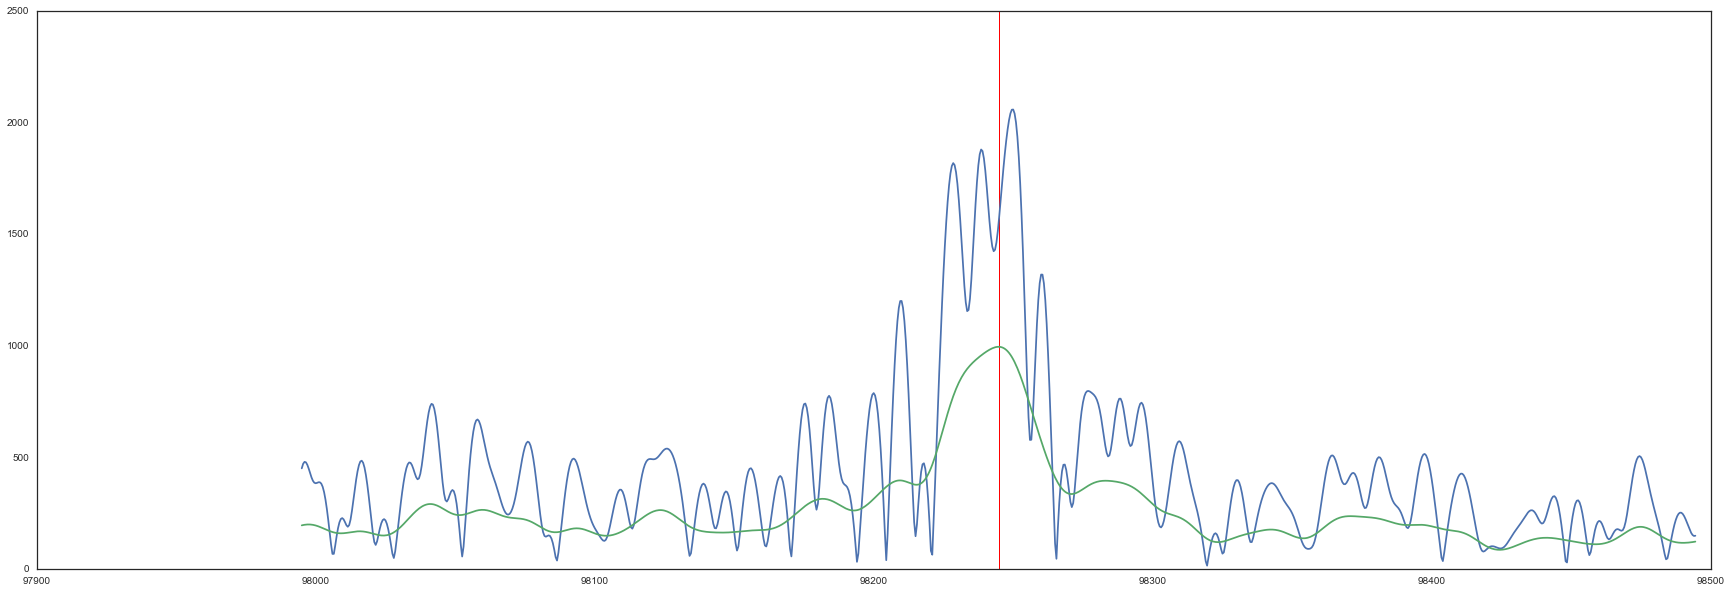

In [10]:
f,ax = plt.subplots(1,1,figsize=[30,10])
rIdx = 356
tP = lfpS.ripples[rIdx][-1]
tArg = tools.findNearest(lfpS.timeAxis,tP)[0]
ax.axvline(tP,color='r',linewidth=1)
ax.plot(lfpS.timeAxis[tArg-500:tArg+500],lfpS.hilbertAbsolute[tArg-500:tArg+500])
ax.plot(lfpS.timeAxis[tArg-500:tArg+500],lfpS.hilbertAbsSmooth[tArg-500:tArg+500]/50)


In [5]:
maxArgs = argrelmax(lfpS.hilbertAbsolute)[0]
difff = []
for ripp in lfpS.ripples:
    tP = ripp[-1]
    tArg = tools.findNearest(lfpS.timeAxis,tP)[0]
    neighborPeak = tools.findNearest(maxArgs,tArg)[1]
    difff.append((neighborPeak-tArg)*lfpS.dt)

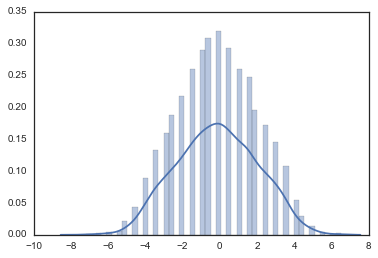

In [11]:
sns.distplot(difff)

In [15]:
PREtimes = lfpS.timeAxis[[0,-1]]
sleepPreTrain = units.time_slice(units.t_start,PREtimes[1])
#sleepPostTrain = pllSpikeTrain.time_slice(LTtimes[1],pllSpikeTrain.t_stop)

In [17]:
sleepPreTrain.binwidth = 1
sleepPreTrain.calcTimeAxis()
sleepPreTrain.burstDetector(kernel_width=20)
sleepPreTrain.MuaDetector()

There is no spiketrain at the moment... 
              Calculating spike trains by covolving with a Gaussian kernel of sigma = 5 ms


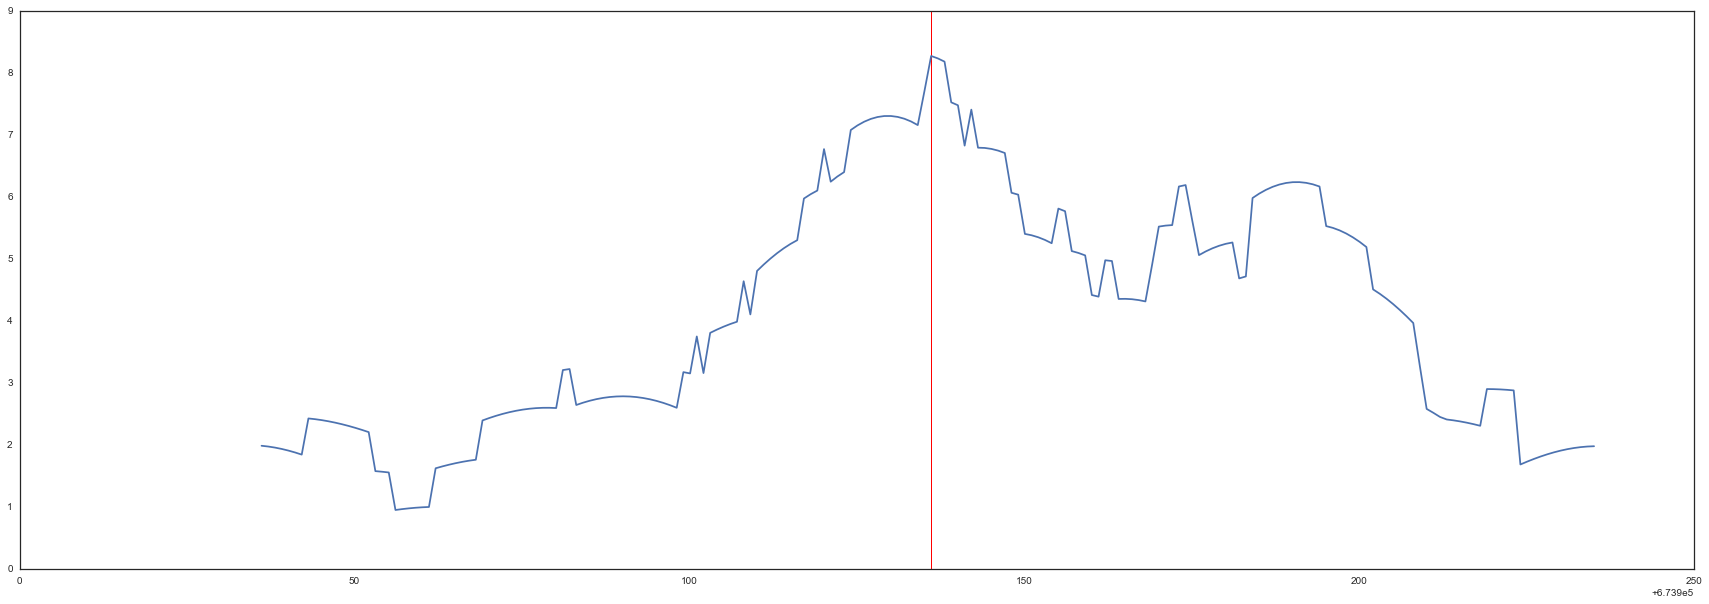

In [31]:
f,ax = plt.subplots(1,1,figsize=[30,10])
rIdx = 343
tP = sleepPreTrain.MultiUnitFiring[rIdx][-1]
tArg = tools.findNearest(sleepPreTrain.timeAxis,tP)[0]
ax.axvline(tP,color='r',linewidth=1)
ax.plot(sleepPreTrain.timeAxis[tArg-100:tArg+100],sleepPreTrain.summedConvolvedSpikeTrains[tArg-100:tArg+100])
#ax.plot(lfpS.timeAxis[tArg-500:tArg+500],lfpS.hilbertAbsSmooth[tArg-500:tArg+500]/50)


In [32]:
maxArgs = argrelmax(sleepPreTrain.summedConvolvedSpikeTrains)[0]
difff = []
for mua in sleepPreTrain.MultiUnitFiring[:100]:
    tP = mua[-1]
    tArg = tools.findNearest(sleepPreTrain.timeAxis,tP)[0]
    neighborPeak = tools.findNearest(maxArgs,tArg)[1]
    difff.append((neighborPeak-tArg))

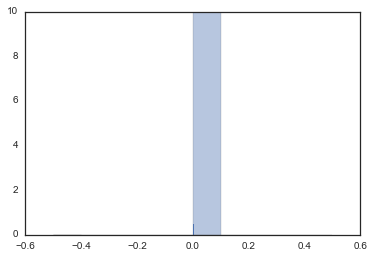

In [33]:
sns.distplot(difff,rug=True)

(290, 360)

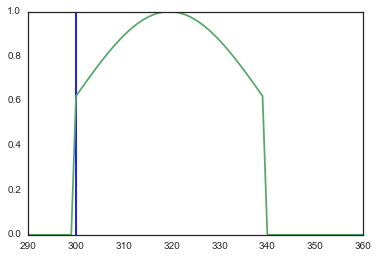

In [66]:
a = np.zeros(1000)
a[300] +=1
plt.axvline(300)
plt.plot(gaussian(40,20))
plt.plot(np.convolve(a,gaussian(40,20),'full'))
plt.xlim([290,360])

In [56]:
gaussian(100,10).shape[-1]

100